In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [68]:
df = pd.read_csv("Dataset/Algerian_forest_fires_dataset_UPDATE.csv",header=1,names=['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes'])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Observation :
    It seems like All Independent features are Numerical variables.
    Dependent feature is Categorical variable.

**shape of the dataset**

In [69]:
df.shape

(246, 14)

In [70]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [71]:
df[df['month'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df.iloc[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [73]:
df.drop(axis=0, index=[122,123],inplace=True)

In [74]:
df.shape

(244, 14)

## Adding Additional column : Region

In [75]:
df['Region'] = None

In [76]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,None
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,None
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,None
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,None
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,None


In [77]:
df.iloc[:122,-1] = "Bejaia"
#'Bejaia'

In [78]:
df.iloc[122:,-1] = "Sidi-Bel Abbes"

In [79]:
df['Region'].value_counts()

Bejaia            122
Sidi-Bel Abbes    122
Name: Region, dtype: int64

## Data type checking

In [80]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [81]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [82]:
for feature in df.columns:
    print(df[feature].value_counts().sort_index())
    print('---------------------------')

01    8
02    8
03    8
04    8
05    8
06    8
07    8
08    8
09    8
10    8
11    8
12    8
13    8
14    8
15    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    4
Name: day, dtype: int64
---------------------------
06    60
07    62
08    62
09    60
Name: month, dtype: int64
---------------------------
2012    244
Name: year, dtype: int64
---------------------------
22     2
24     3
25     6
26     5
27     8
28    15
29    18
30    22
31    25
32    21
33    23
34    24
35    29
36    21
37     9
38     3
39     6
40     3
42     1
Name: Temperature, dtype: int64
---------------------------
21    1
24    1
26    1
29    1
31    1
     ..
86    3
87    4
88    3
89    3
90    1
Name: RH, Length: 62, dtype: int64
---------------------------
10     3
11     7
12     7
13    30
14    43
15    40
16    27
17    28
18    26
19    15
20     2
21     8
22     2
26     1
29     1
6      1
8      1
9      2
N

In [129]:
categorical_features = ['day', 'month', 'year', 'Region']

**By names we can tell column should be in numerical so will convert to numerical features**

In [86]:
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [87]:
df[numerical_features].apply(pd.to_numeric)

ValueError: Unable to parse string "14.6 9" at position 165

In [88]:
df.iloc[[165]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


Observation:
Here this perticular row, data is not correctly arranged. Depandant Feature also mentioned as NaN.
Here we can do 2 options, manually correct the file or drop this particular column

In [89]:
df.drop(axis=0, index=[167],inplace=True)

**shape of the dataset**

In [90]:
df.shape

(243, 15)

In [91]:
df[numerical_features] = df[numerical_features].apply(pd.to_numeric)

In [92]:
df.dtypes

day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

## Checking Null values

In [93]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

**Observation: There are no Null vlaues in the dataset**

## Encoding Target varaible : Classes

In [94]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [95]:
df['Classes'].value_counts().index

Index(['fire   ', 'not fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '],
      dtype='object')

In [96]:
df1 = df.copy(deep=True)

In [97]:
df = df1.copy(deep=True)

In [98]:
df['Classes'] = df['Classes'].str.strip()

In [99]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

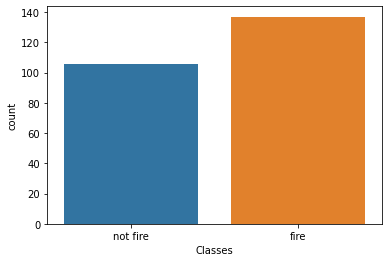

In [100]:
sns.countplot(x = df['Classes'])

### Here most of the features are Numerical so will plot Box plot

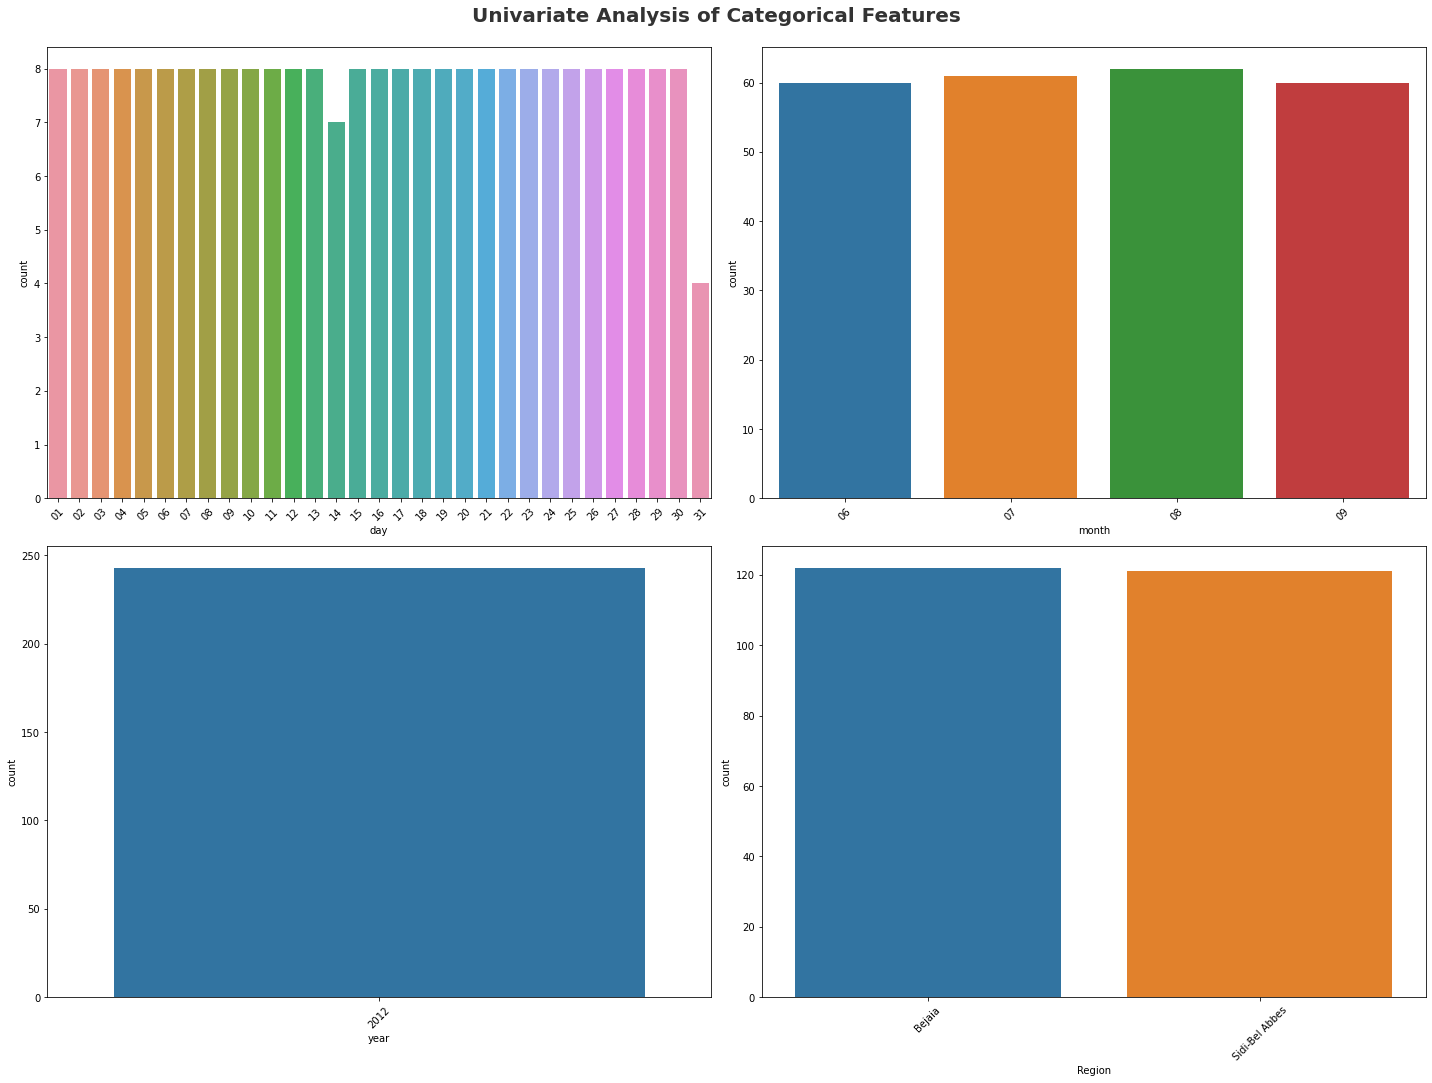

In [121]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['day', 'month', 'year', 'Region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

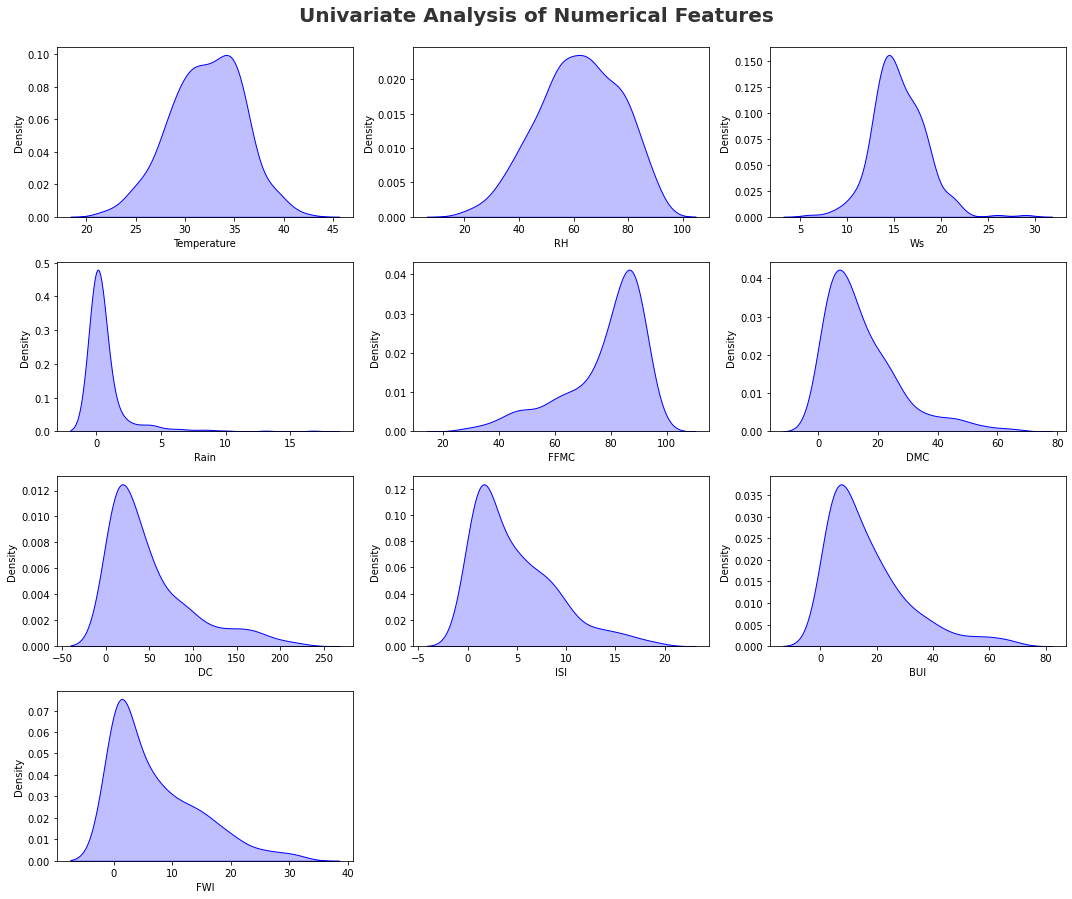

In [138]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

* **RIGHT SKEWED :** RAIN, DMC, DC, ISI, BUI, FWI
* **LEFT SKEWED :** FFMC
* **Outliers :** RAIN, FFMC, DMC, DC, ISI, BUI, FWI

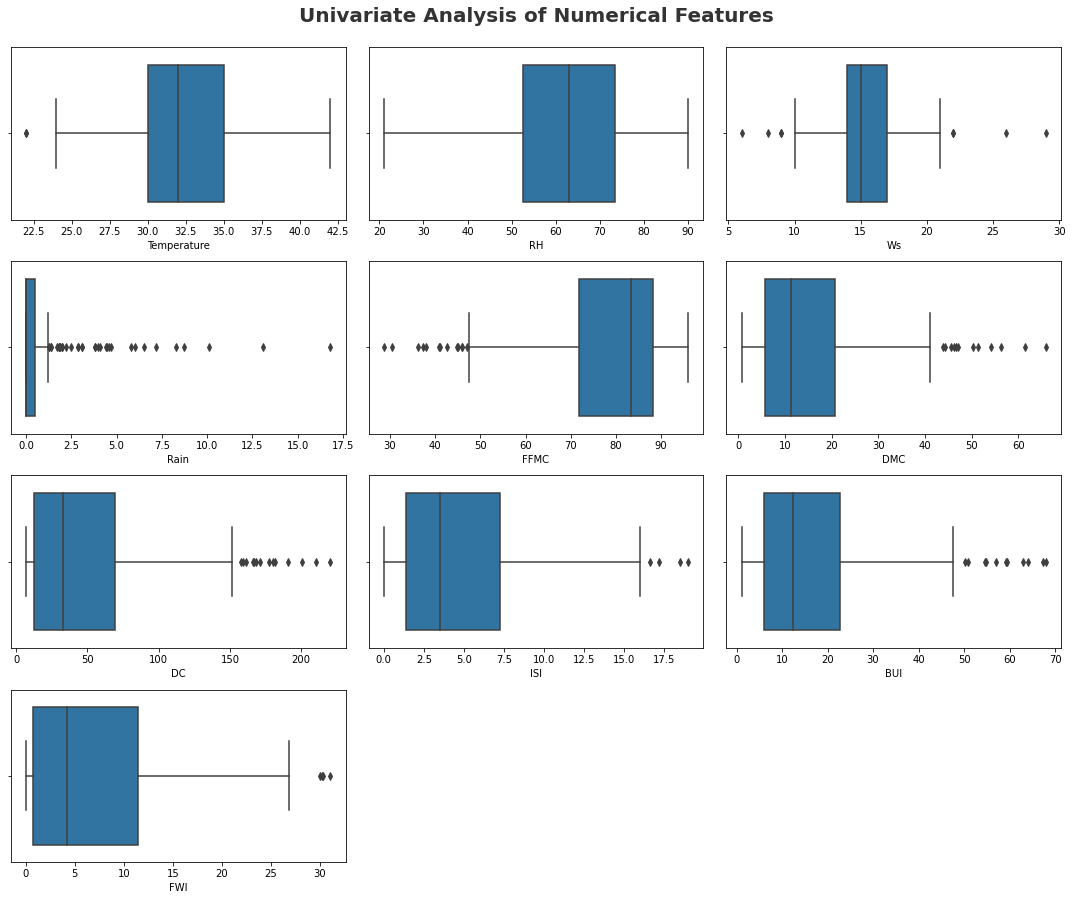

In [141]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Multivariate Analysis

### Check Multicollinearity in Numerical features

In [146]:
df[(list(df.columns)[1:])].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


<AxesSubplot:>

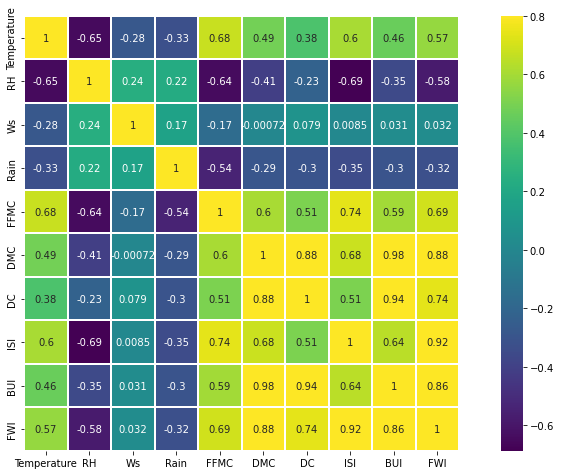

In [159]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df[numerical_features].corr(),vmax=0.8,linewidths=0.01,square=True, annot=True,cmap='viridis',
           linecolor='white')

**Observation**
* Below features are highly correlated(Positive corre) (consider >65%):
    1. FFMC and Temp
    2. DC and DMC
    3. ISI with FFMC, DMC
    4. BUI with DMC, DC
    5. FMI with DMC, DC, ISI, BUI
    

<AxesSubplot:>

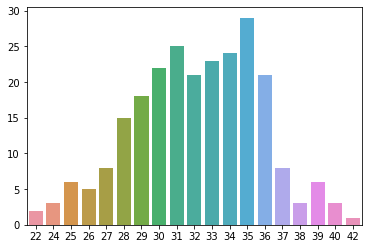

In [278]:
sns.barplot(x = temp_col.index, y = temp_col.values)

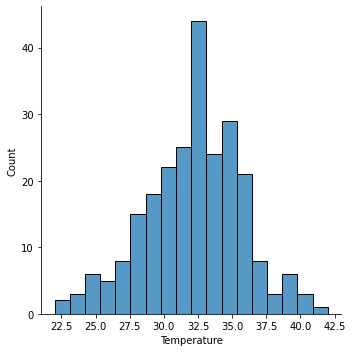

In [283]:
sns.displot(df['Temperature'],bins=18)

Tempature following gaussian/Normal distribution

In [192]:
# which month has highest temperature

df.sort_values(by='Temperature',ascending=False)[['Temperature','day','month','year','Classes','Region']].head(5)

,Temperature,day,month,year,Classes,Region
201,42,17,08,2012,fire,Sidi-Bel Abbes
195,40,11,08,2012,fire,Sidi-Bel Abbes
186,40,02,08,2012,fire,Sidi-Bel Abbes
200,40,16,08,2012,fire,Sidi-Bel Abbes
178,39,25,07,2012,not fire,Sidi-Bel Abbes


* Observation : Month of 8th has Highest Temperature

In [176]:
# what day has lowest temperature

df.sort_values(by='Temperature',ascending=True)[['Temperature','day','month','year','Classes','Region']].head(5)

,Temperature,day,month,year,Classes,Region
105,22,14,09,2012,not fire,Bejaia
93,22,02,09,2012,not fire,Bejaia
245,24,30,09,2012,not fire,Sidi-Bel Abbes
244,24,29,09,2012,not fire,Sidi-Bel Abbes
106,24,15,09,2012,not fire,Bejaia


<AxesSubplot:xlabel='month', ylabel='Temperature'>

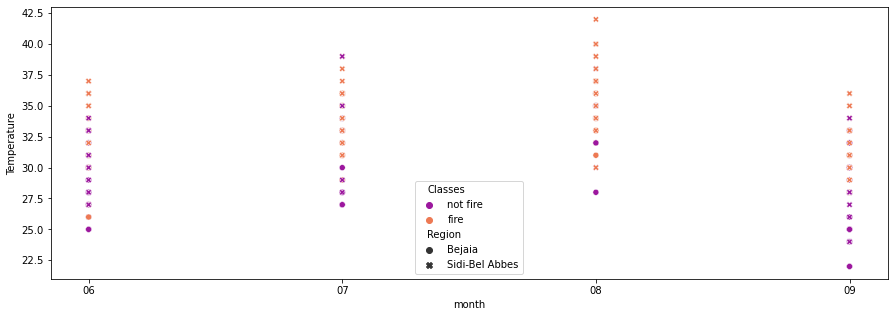

In [242]:
plt.figure(figsize=(15,5))
sns.scatterplot(x =df['month'], y =df['Temperature'].sort_values(),hue=df['Classes'],style=df['Region'], palette ='plasma')

* Observation : 
    * Lowest temperature registered on 9th month
    * Sidi-Bel Abbes Region getting fired is very
    * Temparature is very on Sidi-Bel bbes
    * Bejaia Region registering low Temperatures compare to Sidi-Bel Abbes
    * Threshold value is 27 degrees, above 27 degrees chances of getting fire is very high

In [212]:
df.groupby('Region')['Temperature'].nlargest(5)

Region             
Bejaia          77     37
                55     36
                56     36
                61     36
                75     36
Sidi-Bel Abbes  201    42
                186    40
                195    40
                200    40
                166    39
Name: Temperature, dtype: int64

In [214]:
df.groupby('Region')['Temperature'].nsmallest(5)

Region             
Bejaia          93     22
                105    22
                106    24
                3      25
                8      25
Sidi-Bel Abbes  244    24
                245    24
                239    26
                132    27
                135    27
Name: Temperature, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

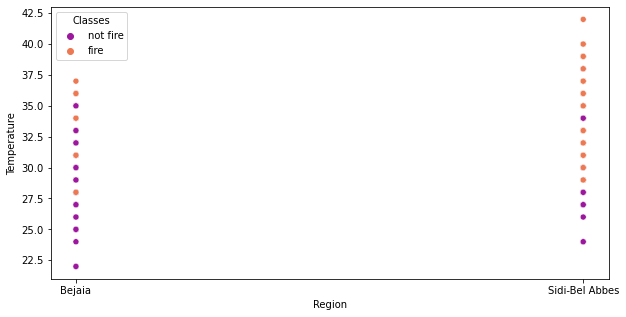

In [275]:
plt.figure(figsize=(10,5))
sns.scatterplot(x =df['Region'], y =df['Temperature'].sort_values(),hue=df['Classes'], palette ='plasma')

* Observation : Sidi-Bel Abbes - Tempearatures are very high compare to Bejaria
    * Hightest Temp in Bejaria is 37
    * Hightest Temp in Sidi-Bel Abbes is 42

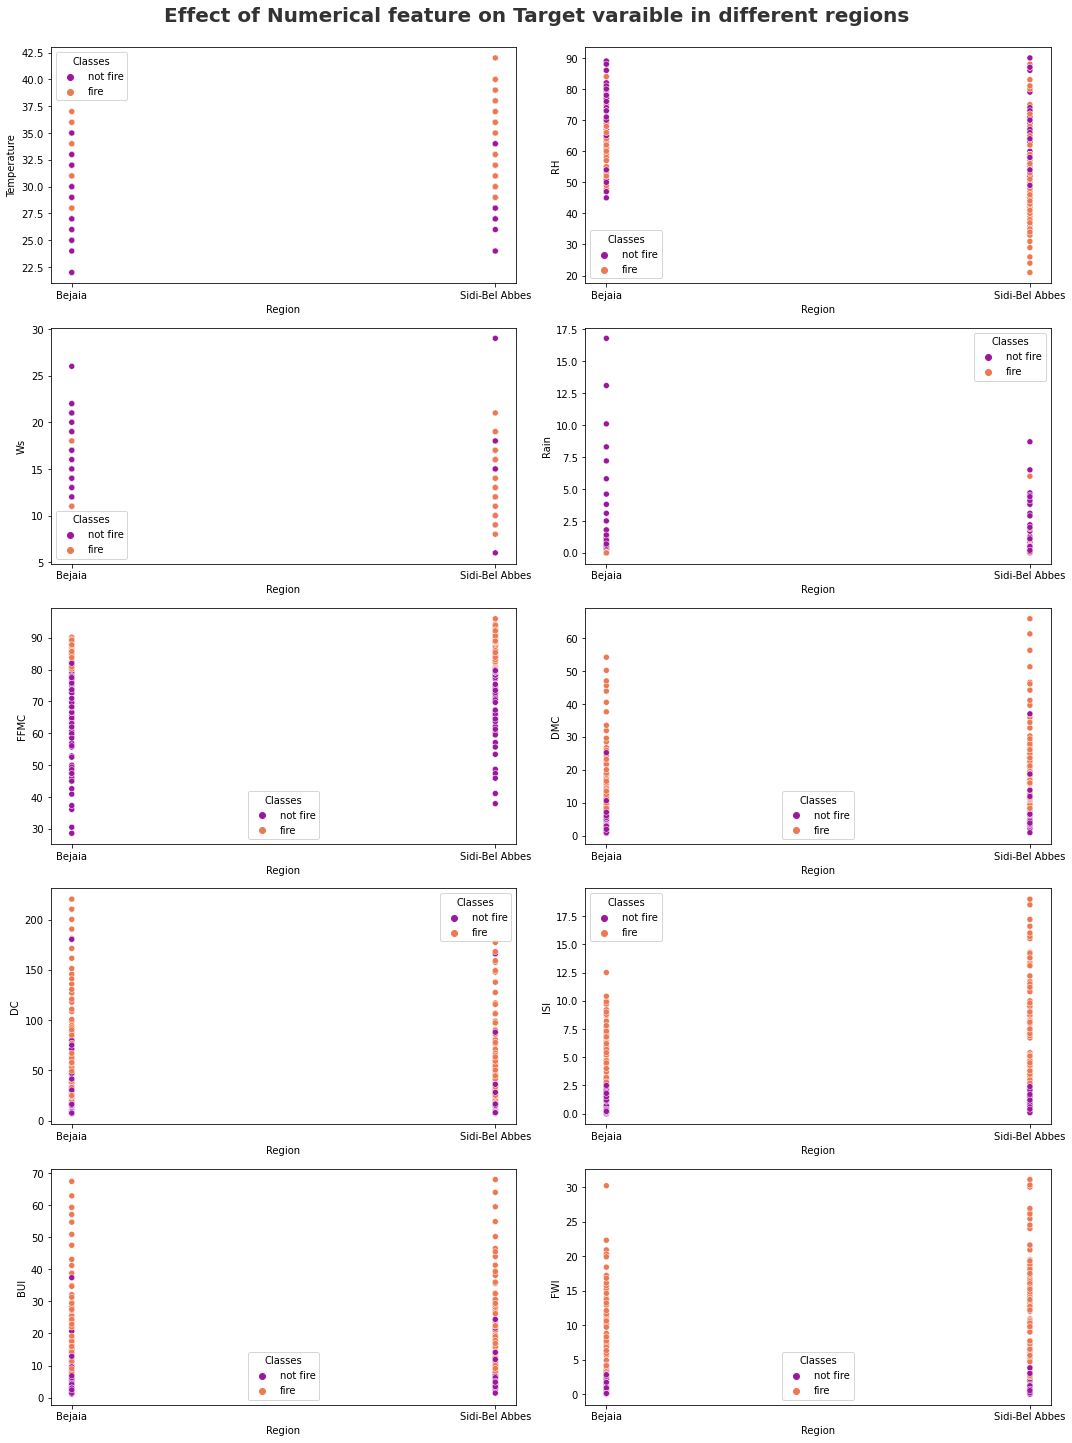

In [272]:
plt.figure(figsize=(15,20))
plt.suptitle("Effect of Numerical feature on Target varaible in different regions",fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numerical_features)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x =df['Region'], y =df[numerical_features[i]].sort_values(),hue=df['Classes'], palette ='plasma')
    plt.tight_layout()

* Observation:
    * In ['Temperature', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
        * When above columns are increasing chances of getting fired increasing (+ve Correlated)
    * In ['RH', 'Ws','Rain']
        * When above columns are increasing chances of getting fired decreasing (-ve Correlated)